___

In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [5]:
cols = [
    
### -----  < X > (PRE-FLIGHT DATA) -----

# Time Period
 'YEAR',
#  'QUARTER', # Disregarded: redundant
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
#  'FL_DATE', # Disregarded: redundant
# Airline / Aircraft
 'OP_UNIQUE_CARRIER',
#  'OP_CARRIER_AIRLINE_ID', # Disregarded: redundant
#  'OP_CARRIER', # Disregarded: redundant
 'TAIL_NUM',
#  'OP_CARRIER_FL_NUM', # Unknown in advance?
# Origin
#  'ORIGIN_AIRPORT_ID', # Disregarded: redundant
#  'ORIGIN_AIRPORT_SEQ_ID', # Disregarded: redundant
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
#  'ORIGIN_CITY_NAME', # Disregarded: redundant
#  'ORIGIN_STATE_ABR', # Disregarded: redundant
#  'ORIGIN_STATE_FIPS', # Federal Information Processing Standards # Not used for the moment
#  'ORIGIN_STATE_NM', # Disregarded: redundant
#  'ORIGIN_WAC', # World Area Code # Not used for the moment
# Destination
#  'DEST_AIRPORT_ID', # Disregarded: redundant
#  'DEST_AIRPORT_SEQ_ID', # Disregarded: redundant
 'DEST_CITY_MARKET_ID',
 'DEST',
#  'DEST_CITY_NAME', # Disregarded: redundant
#  'DEST_STATE_ABR', # Disregarded: redundant
#  'DEST_STATE_FIPS', # Federal Information Processing Standards # Not used for the moment
#  'DEST_STATE_NM', # Disregarded: redundant
#  'DEST_WAC', # World Area Code # Not used for the moment
# Departure Performance
 'CRS_DEP_TIME',
#  'TAXI_OUT_median', #  Output / However, the median for each airport could be used as input !! (explanation below)   
# Arrival Performance
 'CRS_ARR_TIME',
#  'TAXI_IN_median', #  Output / However, the median for each airport could be used as input !! (explanation below) 
# Flight Summaries
 'CRS_ELAPSED_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',

### ----- < y > (PRE-FLIGHT DATA) -----

# Departure Performance
#  'DEP_TIME', # Disregarded: redundant
#  'DEP_DELAY', # Disregarded: other potentially useful target
#  'DEP_DELAY_NEW', # Disregarded: redundant
#  'DEP_DEL15', # Disregarded: other potentially useful target
#  'DEP_DELAY_GROUP', # Disregarded: not relevant for this particular analysis
#  'DEP_TIME_BLK', # Disregarded: redundant
#  'TAXI_OUT', #  Output / However, the median for each airport could be used as input !! (explanation below)
#  'WHEELS_OFF', # Disregarded: redundant
# Arrival Performance
#  'WHEELS_ON', # Disregarded: redundant
#  'TAXI_IN', #  Output / However, the median for each airport could be used as input !! (explanation below)
#  'ARR_TIME', # Disregarded: redundant
#  'ARR_DELAY', # -------------------------------------------> MAIN TARGET !! (i.e. < y >)
#  'ARR_DELAY_NEW', # Disregarded: redundant
 'ARR_DEL15', # Disregarded: other potentially useful target
#  'ARR_DELAY_GROUP', # Disregarded: not relevant for this particular analysis
#  'ARR_TIME_BLK', # Disregarded: redundant
# Cancellations and Diversions
#  'CANCELLED', # Disregarded: not relevant for this particular analysis
#  'CANCELLATION_CODE', # Disregarded: not relevant for this particular analysis
#  'DIVERTED', # Disregarded: not relevant for this particular analysis
# Flight Summaries
#  'ACTUAL_ELAPSED_TIME', # Disregarded: redundant
#  'AIR_TIME', # Disregarded: redundant
# Cause of Delay
#  'CARRIER_DELAY', # Disregarded: other potentially useful target
#  'WEATHER_DELAY', # Disregarded: other potentially useful target
#  'NAS_DELAY', # Disregarded: other potentially useful target
#  'SECURITY_DELAY', # Disregarded: other potentially useful target
#  'LATE_AIRCRAFT_DELAY', # Disregarded: other potentially useful target
# Gate Return Information at Origin Airport (Data starts 10/2008)
#  'FIRST_DEP_TIME', # Disregarded: not relevant for this particular analysis
#  'TOTAL_ADD_GTIME', # Disregarded: not relevant for this particular analysis
#  'LONGEST_ADD_GTIME', # Disregarded: not relevant for this particular analysis
# Diverted Airport Information (Data starts 10/2008)
#  'DIV_AIRPORT_LANDINGS', # Disregarded: not relevant for this particular analysis
]

In [19]:
cols

['YEAR',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'TAIL_NUM',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'CRS_ELAPSED_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'ARR_DEL15']

In [6]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT",
                                           "AL_OTP_MVP_Preprocessed_19_v2_clean.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\AL_OTP_MVP_Preprocessed_19_v2_clean.csv'

In [7]:
%%time

df = pd.read_csv(preprocessed_input_csv_path,
                 encoding='latin1',
                 nrows=1e3,
                 usecols=cols, # This way, the extra column is disregarded for the loading process
                 low_memory = False)

Wall time: 26 ms


### Feature analysis

[Dealing with categorical features with high cardinality: Target Encoding](https://medium.com/@kr.vishwesh54/dealing-with-categorical-features-with-high-cardinality-target-encoding-baa9298bf257)

In [8]:
X = df.drop('ARR_DEL15', axis=1)
X.sample(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_CITY_MARKET_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
594,2019,1,31,4,9E,N135EV,31703,LGA,34492,RDU,1630,1824,114.0,1.0,431.0,2
637,2019,1,15,2,9E,N8775A,31295,DTW,31612,EVV,2015,2107,112.0,1.0,363.0,2
538,2019,1,14,1,9E,N8837B,31295,DTW,35412,TYS,1740,1919,99.0,1.0,443.0,2
339,2019,1,10,4,9E,N8970D,30397,ATL,31612,EVV,1541,1609,88.0,1.0,350.0,2
570,2019,1,4,5,9E,N914XJ,30397,ATL,31135,MYR,1554,1708,74.0,1.0,317.0,2


In [9]:
y = df['ARR_DEL15']
y.sample(5)

998    0.0
511    0.0
625    0.0
473    0.0
989    0.0
Name: ARR_DEL15, dtype: float64

___

In [10]:
%memit

peak memory: 137.35 MiB, increment: 0.13 MiB


### A Simple Guide to Scikit-learn Pipelines

#### Transformers

Before building the pipeline, let's split the data into a train and test set so that the performance of the model can be validated.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

1. The first step in building the pipeline is to define each transformer type.

In [12]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Wall time: 162 ms


2. Next, let's use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this, the numeric and categorical columns shall be listed.

In [13]:
%%time

numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['ARR_DEL15'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Wall time: 17 ms


#### Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case a simple RandomForestClassifier has been used to start with.

In [14]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Wall time: 482 ms


#### Model selection

**A pipeline can also be used during the model selection process**. The following example code loops through a number of scikit-learn classifiers applying the transformations and training the model.

In [15]:
%%time

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
#     NuSVC(probability=True), # ValueError: b'specified nu is infeasible'
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f \n" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.810 

SVC(C=0.025, probability=True)
model score: 0.805 

DecisionTreeClassifier()
model score: 0.780 

RandomForestClassifier()
model score: 0.820 

AdaBoostClassifier()
model score: 0.825 

GradientBoostingClassifier()
model score: 0.815 

Wall time: 1.16 s


**The pipeline can also be used in grid search** to find the best performing parameters. To do this, let's first create a parameter grid for the chosen model.

*One important thing to note is that there is a need to append the name given to the classifier part of the pipeline to each parameter name. In the code above its name is ‘classifier’ so 'classifier__' has been added to each parameter.*

Next a grid search object has been created, which includes the original pipeline. When fit is called, the transformations are applied to the data, before a cross-validated grid-search is performed over the parameter grid.

In [20]:
%%time

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
# CV = GridSearchCV(rf, param_grid, n_jobs= 1)
CV = GridSearchCV(rf, param_grid, n_jobs= 1, scoring='roc_auc') # change the scorer metric
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 500}
0.7078532192309412
Wall time: 3min 36s


In [17]:
predictions = CV.predict(X_test)
probabilities = CV.predict_proba(X_test)

(0.0, 0.0, 0.0, 0.8)

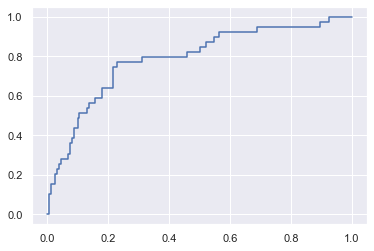

In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score

tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
plt.plot(tpr, fpr)
f1_score(y_test, predictions), recall_score(y_test, predictions), precision_score(y_test, predictions), accuracy_score(y_test, predictions)